# Summary
This notebook is aimed at exploring the data with the help of numerous visualizations.

# Loading Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Getting Started

### Loading data

In [3]:
data = pd.read_csv('../Notebooks/ExtractedFeatures.csv')
data.head()

,Unnamed: 0,mean,sd,median,mode_val,Q25,Q75,IQR,skew,kurt,...,mnf,meanf,minf,maxf,modid,dom_mean,dom_max,dom_min,dom_max_min,label
0,0,3123.714325,2776.661750,2493.191221,225.652096,285.150207,6052.941176,5767.790970,10.325403,172.263410,...,5512.389818,177.783670,0.0,200.454545,0.111111,699.800000,5363.0,1.0,5362.0,Female
1,1,1755.664449,2350.503794,413.008993,220.873597,185.566665,2928.012065,2742.445400,9.883651,152.125737,...,5512.397364,133.302410,0.0,200.454545,0.125000,172.111111,344.0,1.0,343.0,Female
2,2,1902.088347,2157.992567,811.710824,478.668785,479.090892,2435.132471,1956.041579,5.459985,42.105785,...,5512.500000,164.437844,0.0,200.454545,0.041667,807.000000,3776.0,1.0,3775.0,Female
3,3,1365.668177,1925.862107,508.437133,261.908843,229.389960,1444.453634,1215.063675,9.831893,161.079525,...,5512.390139,147.891693,0.0,200.454545,0.100000,386.545455,2017.0,1.0,2016.0,Female
4,4,1335.107028,1496.630294,704.061853,557.901010,463.841666,1609.152500,1145.310834,6.952778,64.861993,...,5512.384731,166.020656,0.0,200.454545,0.050000,564.285714,2274.0,1.0,2273.0,Female


### Checking for null values

In [4]:
data.isnull().sum()

Unnamed: 0     0
mean           1
sd             1
median         0
mode_val       0
Q25            0
Q75            0
IQR            0
skew           1
kurt           1
sp.ent         1
sfm            0
fft_mode       0
fft_max        0
fft_min        0
centroid       1
peakf          0
mnf            0
meanf          0
minf           0
maxf           0
modid          0
dom_mean       0
dom_max        0
dom_min        0
dom_max_min    0
label          0
dtype: int64

### Dataframe shape

In [11]:
data.dropna(inplace=True)

In [12]:
print("Total number of labels: {}".format(data.shape[0]))
print("Number of male: {}".format(data[data.label == 'Male'].shape[0]))
print("Number of female: {}".format(data[data.label == 'Female'].shape[0]))

Total number of labels: 7441
Number of male: 3930
Number of female: 3511


# Visualizations

### Correlation among features

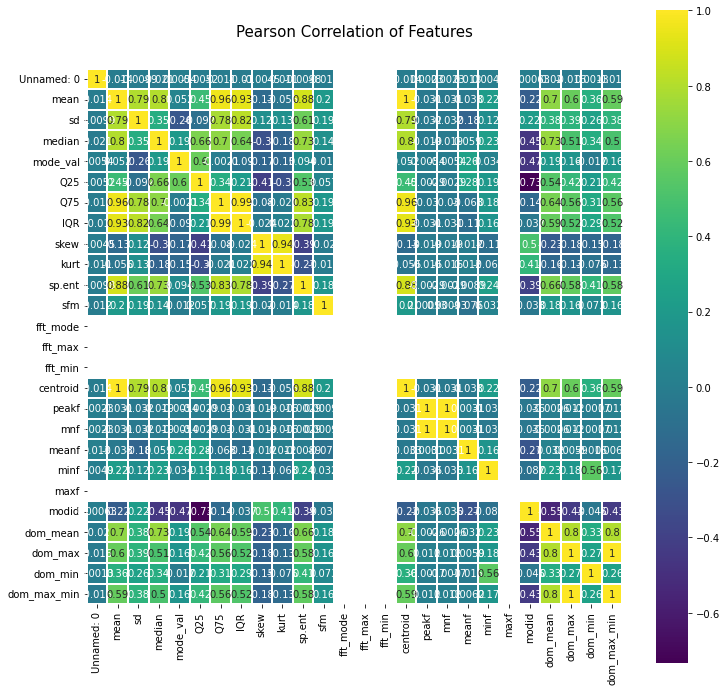

In [13]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.iloc[:,:-1].astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

### TNSE

In [14]:
X = data.iloc[:, :-1]
y = data['label']
y = y.replace({'Male':1,'Female':0})

# Rescale data before TSNE
X_scale = StandardScaler().fit_transform(X)

# Sklearn TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_t = tsne.fit_transform(X_scale)


/home/lazydog/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/lazydog/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


### Scatter plot of given features
You can compare other features by simply change "meanfun" and "meanfreq"

/home/lazydog/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


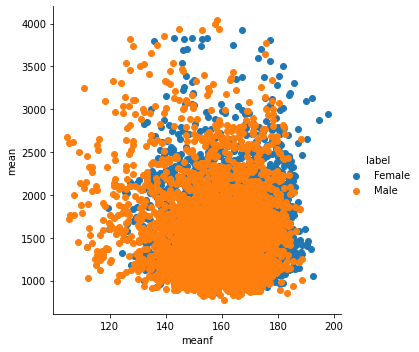

In [18]:
sns.FacetGrid(data, hue="label", size=5)\
   .map(plt.scatter, "meanf", "mean")\
   .add_legend()
plt.show()

/home/lazydog/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


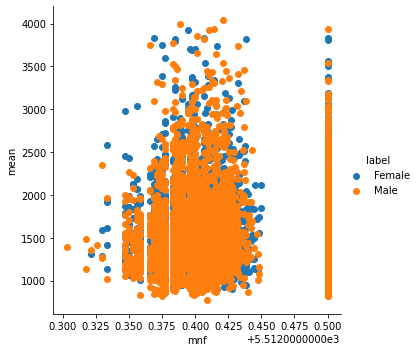

In [20]:
sns.FacetGrid(data, hue="label", size=5)\
   .map(plt.scatter, "mnf", "mean")\
   .add_legend()
plt.show()

### Boxplot
You can visualize other features by substituting "meanfun"

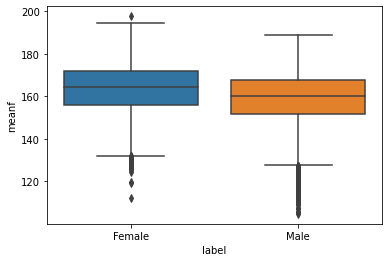

In [25]:
sns.boxplot(x="label",y="meanf",data=data)
plt.show()

### Visualizing multiple feature relations

/home/lazydog/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


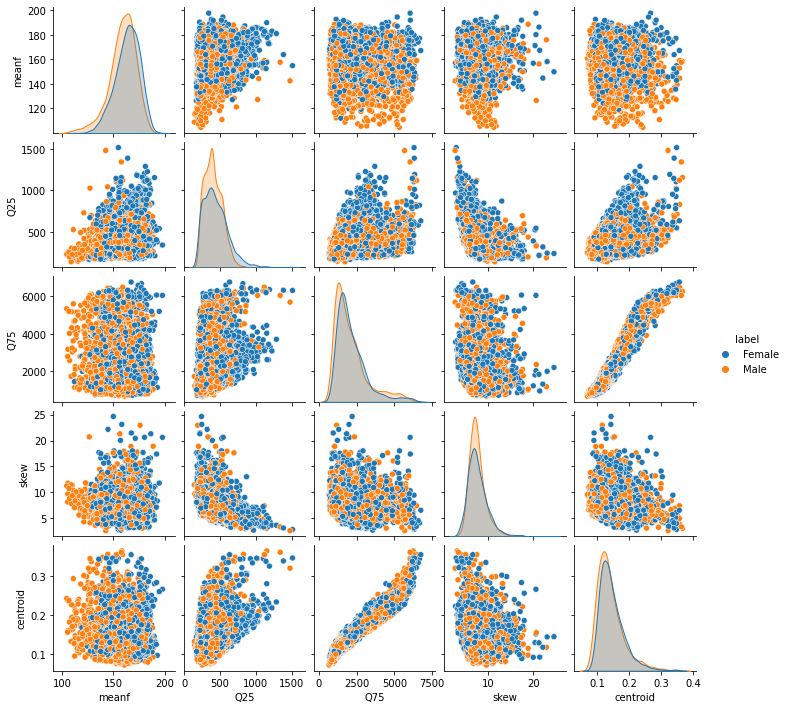

In [32]:
sns.pairplot(data[['meanf', 'Q25', 'Q75', 'skew', 'centroid', 'label']], 
                 hue='label', size=2)
#sns.plt.show()

### Distribution of male and female(every feature)

In [33]:
data.columns

Index(['Unnamed: 0', 'mean', 'sd', 'median', 'mode_val', 'Q25', 'Q75', 'IQR',
       'skew', 'kurt', 'sp.ent', 'sfm', 'fft_mode', 'fft_max', 'fft_min',
       'centroid', 'peakf', 'mnf', 'meanf', 'minf', 'maxf', 'modid',
       'dom_mean', 'dom_max', 'dom_min', 'dom_max_min', 'label'],
      dtype='object')

/home/lazydog/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


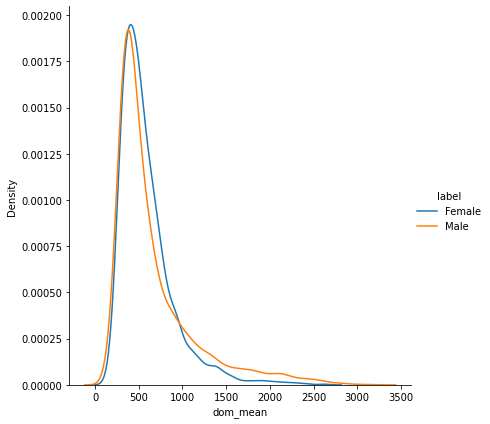

In [35]:
sns.FacetGrid(data, hue="label", size=6) \
   .map(sns.kdeplot, "dom_mean") \
   .add_legend()
plt.show()

### Radviz circle 
Good to compare every feature

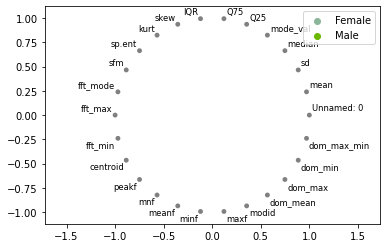

In [38]:
from pandas.plotting import radviz
radviz(data, "label")
plt.show()

In [39]:
data.shape

(7441, 27)